# Machine Learning - Practical 1: Linear Regression

Import Libraries

In [8]:
%matplotlib inline

import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import learning_curve

# Handin 1

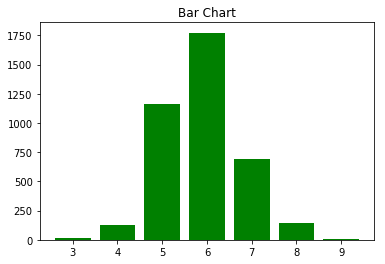

In [9]:
######## TASK 1 ###########

# Define training and test data
X, y = cp.load(open('winequality-white.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

def count_elements(sequence):
    # Count frequency of elements in y_train
    hist = {}
    for i in sequence:
        hist[i] = hist.get(i,0)+1
    return hist

counted = count_elements(y_train)

# Plot frequency distribution of y_train
plt.bar(counted.keys(), counted.values(), color='g')
plt.title('Bar Chart')
plt.show()

# Handin 2

In [5]:
######## TASK 2 ###########


# Define function for the Mean Squared Error
def mserror(y):
    y_mean = np.mean(y)
    i=0
    tot = 0
    for i in range(len(y)):
        tot = tot + (y[i] - y_mean)**2

    mse = tot/len(y)
    return mse

MSE_train = mserror(y_train)
MSE_test = mserror(y_test)
MSE_tot = mserror(y)

print(MSE_train)
print(MSE_test)
print(MSE_tot)

0.7767772386501273
0.8138390254060818
0.784195547519773


# Handin 3

In [7]:
######## TASK 3 ###########

# Define function to calculate array of feature means
def get_feature_means(N, D, X):
    feature_means = []
    for col in range(D):
        feature_means.append(float(0))
        for row in range(N):
            feature_means[-1] += X[row][col]
        feature_means[-1] = feature_means[-1] / N
    return feature_means


# Define function to calculate array of feature variances
def get_feature_std_dev(N, D, X, means):
    feature_std_dev = []
    for col in range(D):
        feature_std_dev.append(float(0))
        for row in range(N):
            feature_std_dev[-1] += (X[row][col] - means[col])**2
        feature_std_dev[-1] = np.sqrt(feature_std_dev[-1] / N)
    return feature_std_dev

# Define function to create a matrix of standardised data
def standardisation(mean, std_dev, data):
    standardised_data = np.ndarray(shape=data.shape, dtype=data.dtype)
    for col in range(data.shape[1]):
        for row in range (data.shape[0]):

            standardised_data[row][col] = (data[row][col] - mean[col]) / std_dev[col]
    return standardised_data

# Define function to create vector of y_hat
def find_w (X, y):
    X_transpose = np.transpose(X)
    w = np.dot(np.dot(inv(np.dot(X_transpose, X)), X_transpose), y)
    return w

# Define function to compute MSE based on linear model fitting
def MSE_linear_regression (real_y, predicted_y):
    tot = 0
    for i in range (len(real_y)):
        tot = tot + ((real_y[i]-predicted_y[i])**2)
    mse = tot/len(real_y)
    return mse

# Standardise all data features for training, 
#test and total data sets with respect to mean
feature_means_train = get_feature_means(N_train, D, X_train)
feature_means_test = get_feature_means(N_test, D, X_test)
feature_means_tot = get_feature_means(N, D, X)

# Standardise all data features for training, test and 
#total data sets with respect to standard deviation
feature_std_dev_train = get_feature_std_dev(N_train, 
                                            D, X_train, feature_means_train)
feature_std_dev_test = get_feature_std_dev(N_test, 
                                           D, X_test, feature_means_test)
feature_std_dev_tot = get_feature_std_dev(N, 
                                          D, X, feature_means_tot)

# Standardise all data features for training,
#and total data sets with respect to mean and standard deviation
standardised_data_train = standardisation(feature_means_train,
                                          feature_std_dev_train,X_train)
standardised_data_test = standardisation(feature_means_test,
                                         feature_std_dev_test,X_test)
standardised_data_tot = standardisation(feature_means_tot,
                                        feature_std_dev_tot,X)

# Standardise test data using the transformation used for the training data
correct_standardised_training_data = standardised_data_train
correct_standardised_test_data = standardisation(feature_means_train, 
                                                 feature_std_dev_train, X_test)
correct_standardised_tot_data = standardisation(feature_means_train, 
                                                feature_std_dev_train, X)

# Include a column of ones to data matrices
b_training = np.ones((N_train,1))
b_test = np.ones((N_test,1))
b_tot = np.ones((N,1))

new_correct_standardised_training_data = np.hstack((b_training, 
                                                    correct_standardised_training_data))
new_correct_standardised_test_data = np.hstack((b_test, 
                                                correct_standardised_test_data))
new_correct_standardised_tot_data = np.hstack((b_tot, 
                                               correct_standardised_tot_data))

# Compute expected y results based on linear fitting
weights = find_w(new_correct_standardised_training_data, y_train)
y_hat_train = np.dot(new_correct_standardised_training_data, weights)
y_hat_test = np.dot(new_correct_standardised_test_data, weights)
y_hat_tot = np.dot(new_correct_standardised_tot_data, weights)

# Compute MSE using linear mappingregression model
MSE_standardised_train = MSE_linear_regression(y_train, y_hat_train)
MSE_standardised_test = MSE_linear_regression(y_test, y_hat_test)
MSE_standardised_tot = MSE_linear_regression(y, y_hat_tot)

print(MSE_standardised_train)
print(MSE_standardised_test)
print(MSE_standardised_tot)


0.563999617394194
0.5607292042283476
0.5633452676795058


# Handin 4

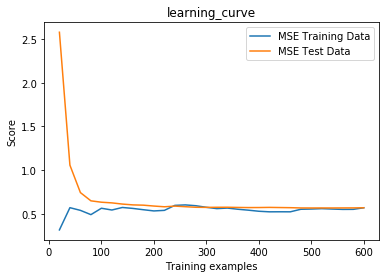

In [10]:
######## TASK 4 ###########

def learning_curve (title, X, y, min_size, max_size, step):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    MSE_train = []
    MSE_test = []

    for i in range (min_size, max_size + 1, step):
        X_train = X[:i]
        y_train = y[:i]
        weight = find_w(X_train, y_train)
        y_hat_train = np.dot(X_train, weight)
        y_hat_test = np.dot(X, weight)
        MSE_standardised_train = MSE_linear_regression(y_train, y_hat_train)
        MSE_standardised_test = MSE_linear_regression(y, y_hat_test)
        MSE_train.append(MSE_standardised_train)
        MSE_test.append(MSE_standardised_test)

    plt.plot(np.linspace(20,600, num=30), MSE_train, label='MSE Training Data')
    plt.plot(np.linspace(20,600, num=30), MSE_test, label='MSE Test Data')
    plt.legend()
    plt.show()

final = learning_curve('learning_curve', 
                       new_correct_standardised_tot_data,y,20,600,20)